<a href="https://colab.research.google.com/github/siddhi011/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud Detection Project


In [ ]:
!pip install -q imbalanced-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from google.colab import files

In [ ]:
csv_path = "/content/creditcard.csv"
df = pd.read_csv(csv_path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
print(df.info())
print(df['Class'].value_counts())
fraud_percentage = (df['Class'].sum() / len(df)) * 100
print(f"Fraudulent Transactions: {fraud_percentage:.2f}%")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81299 entries, 0 to 81298
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    81299 non-null  int64  
 1   V1      81299 non-null  float64
 2   V2      81299 non-null  float64
 3   V3      81299 non-null  float64
 4   V4      81299 non-null  float64
 5   V5      81299 non-null  float64
 6   V6      81298 non-null  float64
 7   V7      81298 non-null  float64
 8   V8      81298 non-null  float64
 9   V9      81298 non-null  float64
 10  V10     81298 non-null  float64
 11  V11     81298 non-null  float64
 12  V12     81298 non-null  float64
 13  V13     81298 non-null  float64
 14  V14     81298 non-null  float64
 15  V15     81298 non-null  float64
 16  V16     81298 non-null  float64
 17  V17     81298 non-null  float64
 18  V18     81298 non-null  float64
 19  V19     81298 non-null  float64
 20  V20     81298 non-null  float64
 21  V21     81298 non-null  float64
 22

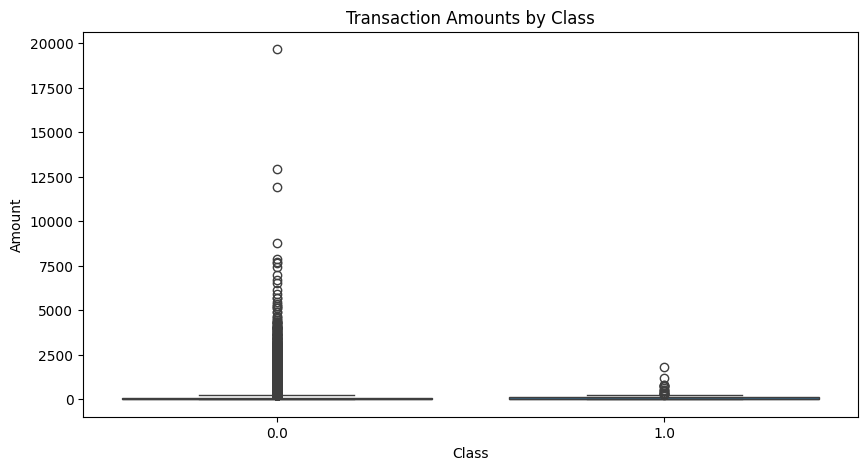

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title("Transaction Amounts by Class")
plt.show()



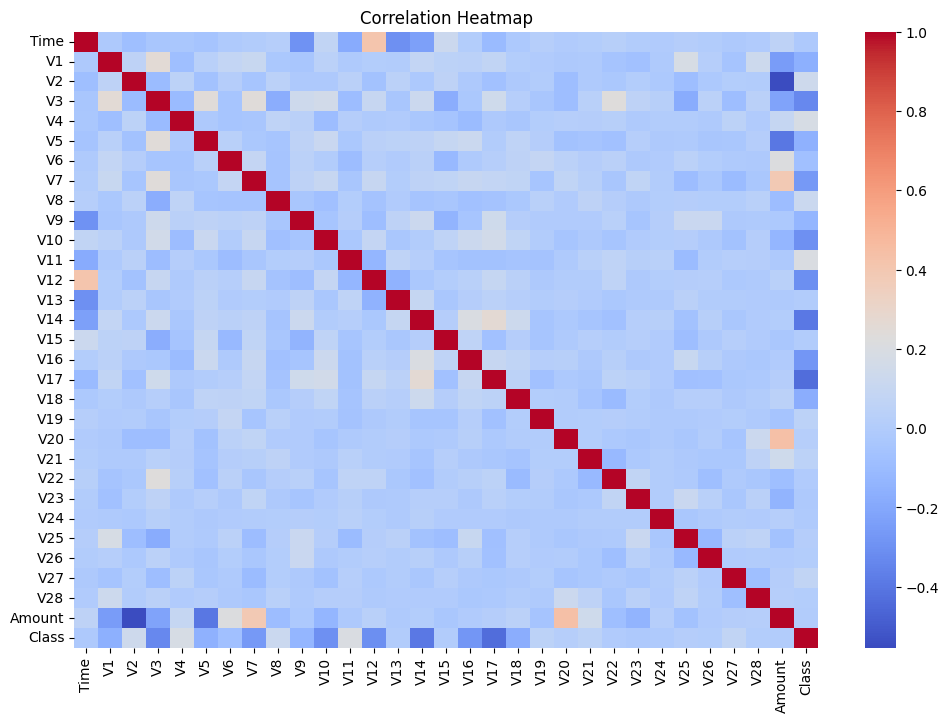

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df.dropna(subset=['Class'], inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print(f"After SMOTE: {np.bincount(y_res.astype(int))}")

After SMOTE: [81100 81100]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24281
         1.0       1.00      1.00      1.00     24379

    accuracy                           1.00     48660
   macro avg       1.00      1.00      1.00     48660
weighted avg       1.00      1.00      1.00     48660



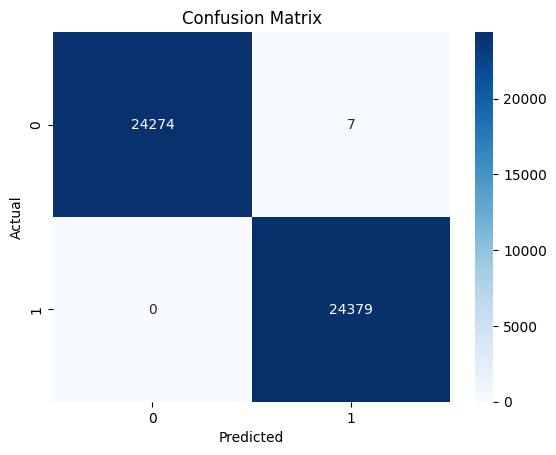

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

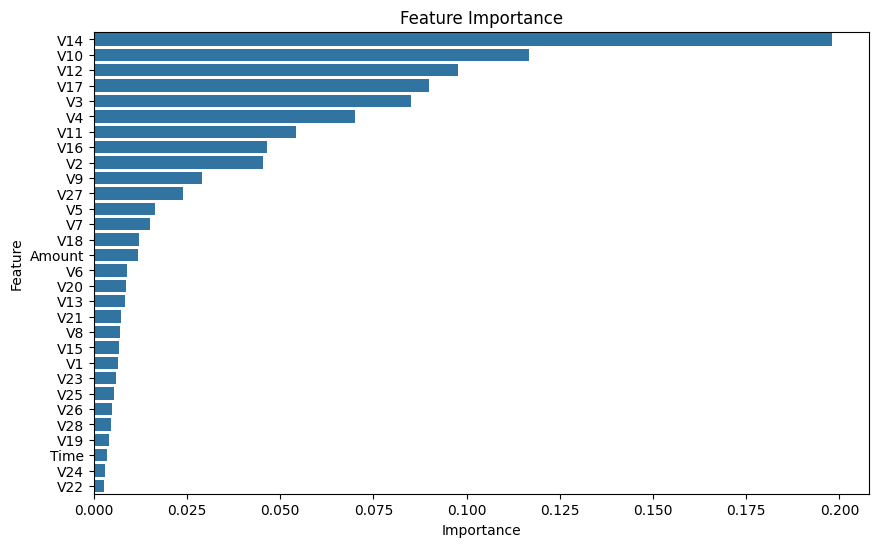

In [ ]:
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance")
plt.show()

In [39]:
def predict_transaction(transaction):
    transaction = pd.DataFrame([transaction], columns=X.columns)
    transaction = pd.DataFrame(scaler.transform(transaction), columns=X.columns)
    result = model.predict(transaction)
    return "Detected successfully: Fraud" if result[0] == 1 else "Detected successfully: Not Fraud"

example = X_test.iloc[0]
print(predict_transaction(example))

Detected successfully: Not Fraud
